

*This concluded analysis focuses on the long-term trends and future cost predictions of various energy technologies, using historical data to forecast how costs might evolve up to 2050. It aims to provide insights into cost efficiencies and guide strategic investments in the energy sector.*


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the dataset

file_path = 'https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/costs-of-66-different-technologies-over-time.csv'
data = pd.read_csv(file_path).copy()

# check the structure of the data
# print(data.head())
# print(data.tail())
# print(data.shape[0])

# print(len(data))

unique_entity_names = data['Entity'].unique()
print(unique_entity_names)




# Display the columns to see what types of technologies are included
# print(data.columns)

['Acrylic fiber' 'Acrylonitrile' 'Aluminum' 'Ammonia' 'Aniline'
 'Automotive (US)' 'Beer (Japan)' 'Benzene' 'Bisphenol A' 'CCGT power'
 'Caprolactam' 'Carbon black' 'Carbon disulfide' 'Concentrating solar'
 'Corn (US)' 'Crude oil' 'Cyclohexane' 'DNA sequencing' 'DRAM'
 'Electric range' 'Ethanol (Brazil)' 'Ethanolamine' 'Ethylene'
 'Formaldehyde' 'Free standing gas range' 'Geothermal electricity'
 'Hard disk drive' 'Hydrofluoric acid' 'Isopropyl alcohol' 'Laser diode'
 'Low-density polyethylene' 'Magnesium' 'Maleic anhydride' 'Methanol'
 'Milk (US)' 'Monochrome television' 'Motor gasoline' 'Neoprene rubber'
 'Nuclear electricity' 'Onshore gas pipeline' 'Paraxylene'
 'Pentaerythritol' 'Phenol' 'Photovoltaics' 'Phthalic anhydride'
 'Polyester fiber' 'Polyethylene HD' 'Polyethylene LD' 'Polypropylene'
 'Polystyrene' 'Polyvinylchloride' 'Primary aluminum' 'Primary magnesium'
 'Refined cane sugar' 'Sodium' 'Sodium chlorate' 'Sodium hydrosulfite'
 'Sorbitol' 'Styrene' 'Titanium dioxide' 'Tita

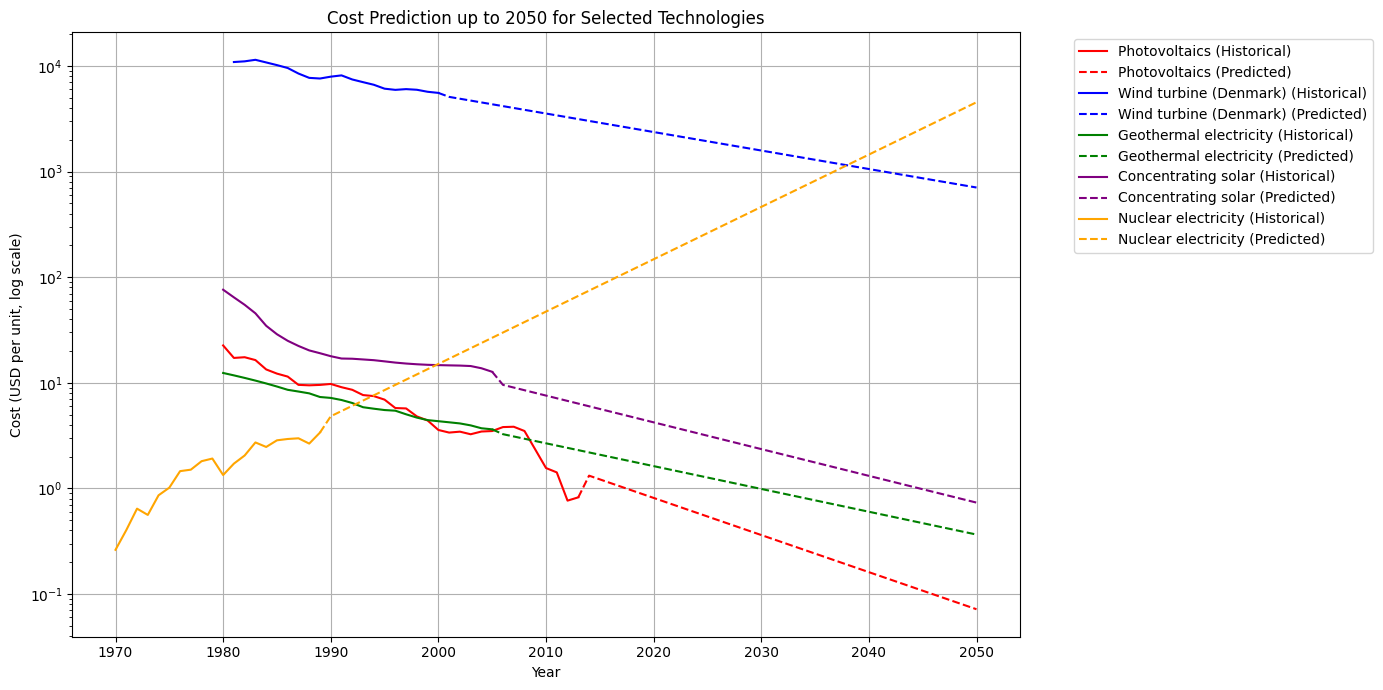

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and prepare data
file_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Co2-QueryThree/costs-of-66-different-technologies-over-time.csv'
data = pd.read_csv(file_path).copy()
selected_technologies = ['Photovoltaics', 'Wind turbine (Denmark)', 'Geothermal electricity', 'Concentrating solar', 'Nuclear electricity']
filtered_data = data[data['Entity'].isin(selected_technologies)].copy()

# Initialize a plot
plt.figure(figsize=(14, 7))

# Define colors for each technology
colors = {
    "Photovoltaics": "red",
    "Wind turbine (Denmark)": "blue",
    "Geothermal electricity": "green",
    "Concentrating solar": "purple",
    "Nuclear electricity": "orange"
}

# Process each technology
for technology in selected_technologies:
    tech_data = filtered_data[filtered_data['Entity'] == technology].copy()
    X = tech_data['Year'].values.reshape(-1, 1).copy()
    y = tech_data['Technology cost'].values.copy()  # Convert to numpy array to use negative indexing

    if y.size == 0:
        continue  # Skip if there are no data points to avoid errors

    # Apply natural logarithm to the cost to linearize the exponential decay model
    y_log = np.log(y)

    # Linear regression on the transformed data
    model = LinearRegression()
    model.fit(X, y_log)

    # Prepare for future predictions starting from the last recorded historical year
    last_year = X.max()
    future_years = np.arange(last_year, 2051).copy()
    predicted_log_costs = model.predict(future_years.reshape(-1, 1)).copy()
    predicted_costs = np.exp(predicted_log_costs).copy()  # Transform back to the original scale using the exponential function

    # Adjust the first point of the prediction to match the last historical point
    predicted_costs[0] = y[-1]

    # Plotting historical data
    plt.plot(X.flatten(), y, label=f"{technology} (Historical)", linestyle='-', color=colors[technology])

    # Plotting predictions, ensuring continuity
    plt.plot(future_years, predicted_costs, label=f"{technology} (Predicted)", linestyle='--', color=colors[technology])

plt.yscale('log')
plt.title('Cost Prediction up to 2050 for Selected Technologies')
plt.xlabel('Year')
plt.ylabel('Cost (USD per unit, log scale)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()



**Conclusion:**

**"Which non-fossil fuel energy technology will have the best price in the future?"**

Based on the analysis of long-term trends and cost predictions, **solar photovoltaics (PV) and concentrating solar power** are projected to have the steepest decline in costs by 2050, making them the most promising technologies in terms of future price competitiveness. These technologies are expected to continue their downward trend, driven by economies of scale, technological advancements, and increasing adoption globally. As the costs of photovoltaics and concentrating solar drop, they will likely become the most cost-effective solutions in the renewable energy market, making them key drivers of future energy transitions.

Wind and geothermal energy are also expected to see significant reductions in cost, but their price declines are projected to be less steep compared to solar technologies. Nevertheless, these technologies remain important components of a diversified renewable energy mix, and their cost reductions will contribute to their wider adoption globally. Overall, the analysis highlights that solar energy, particularly photovoltaics and concentrating solar, is poised to lead the way in terms of cost efficiency, positioning them as the best non-fossil fuel energy technologies for the future.
